In [316]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [317]:
def add_gaussian_noise(image, mean=0, stddev=25):
    gaussian_noise = np.random.normal(mean, stddev, image.shape)
    noisy_image = image + gaussian_noise
    noisy_image = np.clip(noisy_image, 0, 255)
    return noisy_image

In [318]:
def ideal_highpass_filter(image, cutoff_frequency):
    height, width = image.shape
    F = np.fft.fftshift(np.fft.fft2(image))
    H = np.zeros(image.shape, dtype=np.float32)

    D0 = cutoff_frequency
    for u in range(height):
        for v in range(width):
            D = np.sqrt((u - height / 2) ** 2 + (v - width / 2) ** 2)
            if D >= D0:
                H[u, v] = 1
    G = F * H
    filtered_image = np.fft.ifft2(np.fft.ifftshift(G))
    return np.abs(filtered_image)

In [319]:
def gaussian_highpass_filter(image, cutoff_frequency):
    height, width = image.shape

    F = np.fft.fftshift(np.fft.fft2(image))
    H = np.zeros(image.shape, dtype=np.float32)

    D0 = cutoff_frequency
    for u in range(height):
        for v in range(width):
            D = np.sqrt((u - height / 2) ** 2 + (v - width / 2) ** 2)
            H[u, v] = 1 - np.exp(-(D ** 2) / (2 * (D0 ** 2)))

    G = F * H
    filtered_image = np.fft.ifft2(np.fft.ifftshift(G))
    return np.abs(filtered_image)

In [320]:
original_image = cv2.imread('./images/pcb.png', 0)
gray_image = cv2.resize(original_image, (512, 512))

In [321]:
gaussian_noisy_image = add_gaussian_noise(gray_image, 0, 25)

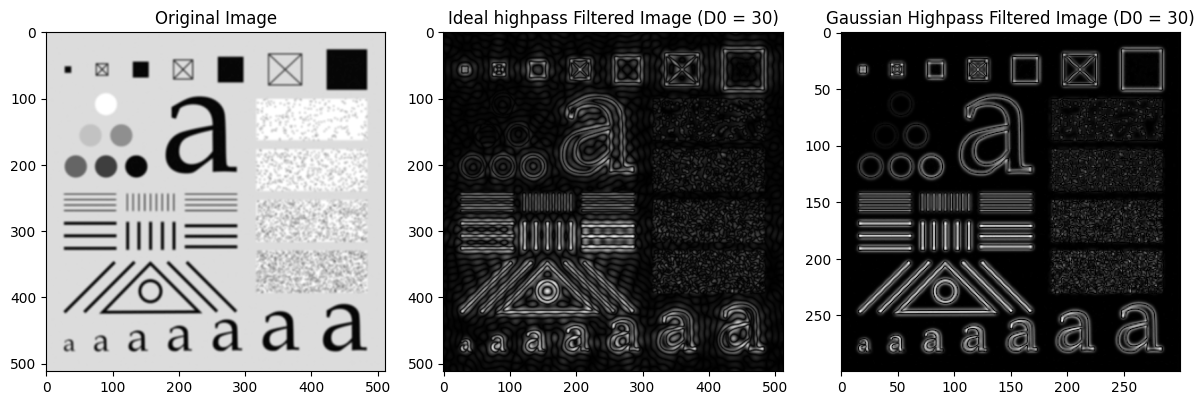

In [322]:
plt.figure(figsize=(12, 10))
cutoff_frequency = 30

ideal_highpass_filtered_image = ideal_highpass_filter(gray_image, cutoff_frequency)
gaussian_highpass_filtered_image = gaussian_highpass_filter(original_image, cutoff_frequency)

plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title(f"Original Image")

plt.subplot(1, 3, 2)
plt.imshow(ideal_highpass_filtered_image, cmap='gray')
plt.title(f"Ideal highpass Filtered Image (D0 = {cutoff_frequency})")

plt.subplot(1, 3, 3)
plt.imshow(gaussian_highpass_filtered_image, cmap='gray')
plt.title(f"Gaussian Highpass Filtered Image (D0 = {cutoff_frequency})")

plt.tight_layout()
plt.show()

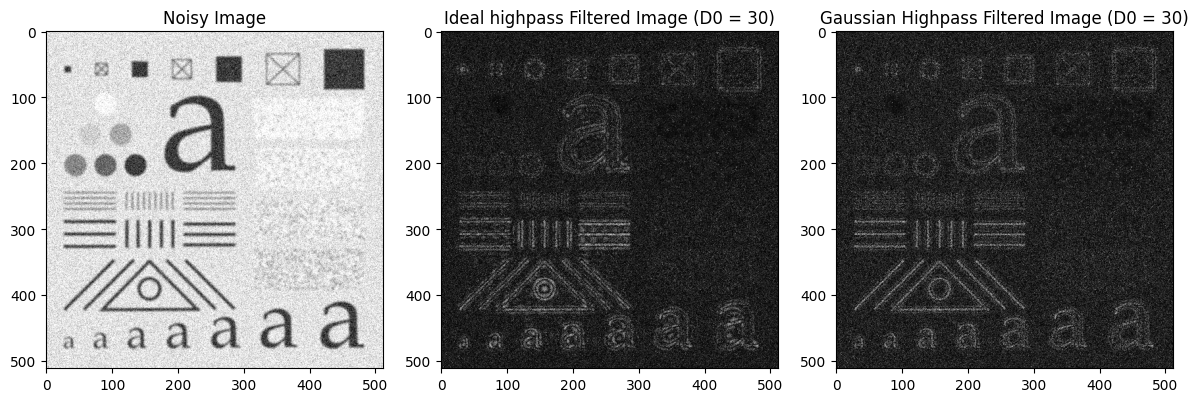

In [323]:
plt.figure(figsize=(12, 10))
cutoff_frequency = 30

ideal_highpass_filtered_image = ideal_highpass_filter(gaussian_noisy_image, cutoff_frequency)
gaussian_highpass_filtered_image = gaussian_highpass_filter(gaussian_noisy_image, cutoff_frequency)

plt.subplot(1, 3, 1)
plt.imshow(gaussian_noisy_image, cmap='gray')
plt.title(f"Noisy Image")

plt.subplot(1, 3, 2)
plt.imshow(ideal_highpass_filtered_image, cmap='gray')
plt.title(f"Ideal highpass Filtered Image (D0 = {cutoff_frequency})")

plt.subplot(1, 3, 3)
plt.imshow(gaussian_highpass_filtered_image, cmap='gray')
plt.title(f"Gaussian Highpass Filtered Image (D0 = {cutoff_frequency})")

plt.tight_layout()
plt.show()